## **Skill Intern India**
### **Task - Exploratory Data Analysis - Retail**
Dataset - https://raw.githubusercontent.com/s-yogeshwaran/Skill-Intern/main/SampleSuperstore.csv

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('https://raw.githubusercontent.com/s-yogeshwaran/Skill-Intern/main/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [61]:
print('Total rows:', df.shape[0])
print('Total columns:', df.shape[1])

Total rows: 9994
Total columns: 13


In [62]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [63]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [64]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
              'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA',
              'Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS',
              'Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA',
              'Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT',
              'Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM',
              'New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK',
              'Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD',
              'Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA',
              'Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}

df['state_code'] = df.State.apply(lambda x: state_code[x])
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,state_code
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,KY
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,KY
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,CA
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,FL
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,FL


In [65]:
state_data = df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index,
    z = state_data.Sales,
    locationmode = 'USA-states',
    colorscale = 'amp',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=500,
)

fig.show()

**From the above given geographical plot**
- The company has the highest sales in the state of California (shown in dark maroon), selling around $450K of goods.

- New York (bright red, top right) is the state with the second highest sales, with more that $300k worth of goods sold.

- The states of Texas (bottommost, orange) and Washington (top left, orange) end up third and fourth on the top sales charts with around $170K and 140K in sales respectively.

- If we look at the overall data, we will observe that the supermarket company does most of its business in East Coast and West Coast region.

In [66]:
fig = go.Figure(data=go.Choropleth(
    locations=state_data.index,
    z = state_data.Profit,
    locationmode = 'USA-states',
    colorscale = 'amp',
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limited map scope to USA
    height=600,
)

fig.show()

**Observations from the above plot:**
- The states in shades of green, namely New York, California and Washington are the most profitable for the company, with profits of over $30K.

- The states in teal and blue, with an average profit of around $25K are mostly situated in the north-east and south-east region.

- The state of Texas, with the third highest sales proved to be the most expensive state for the company with a very high loss of around $25K.

In [67]:
def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

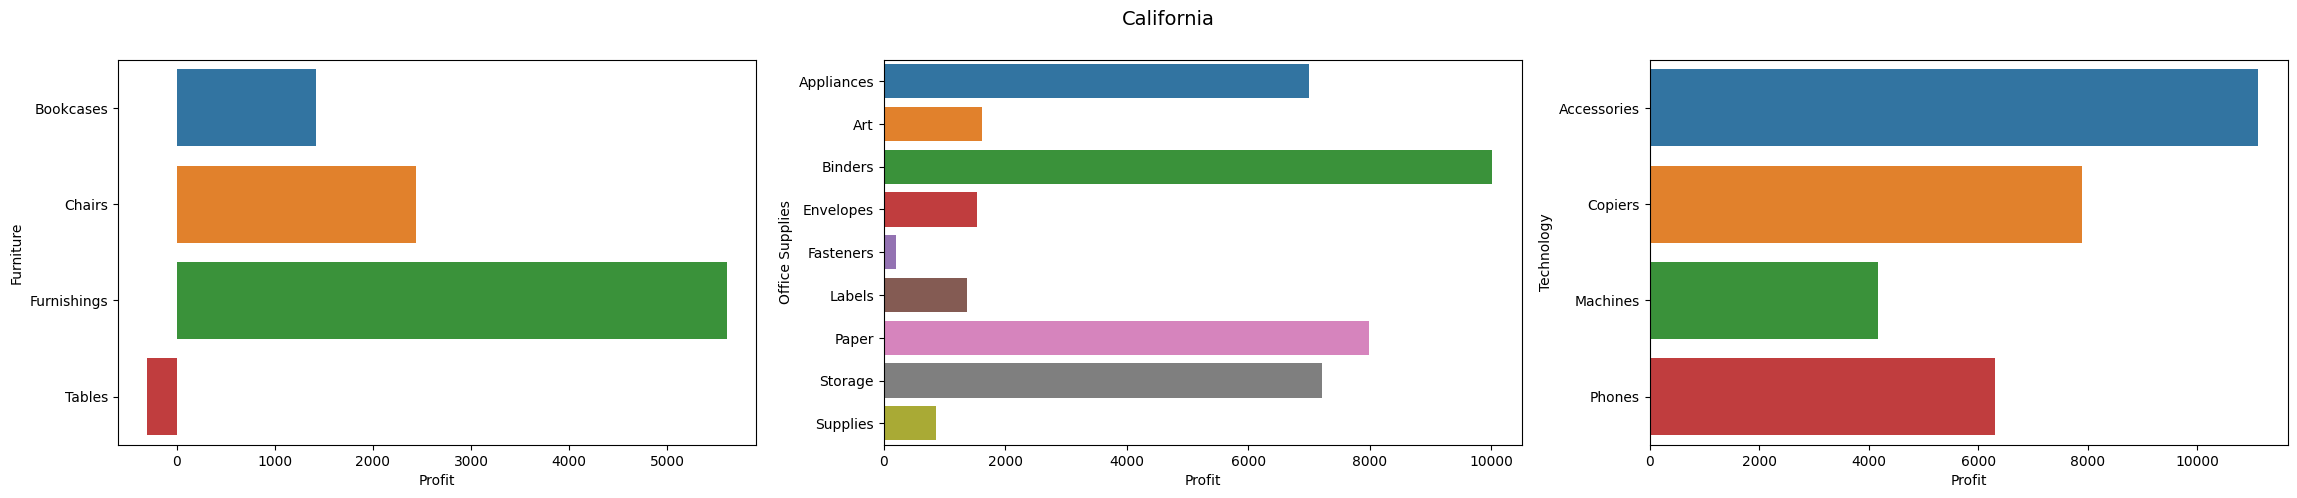

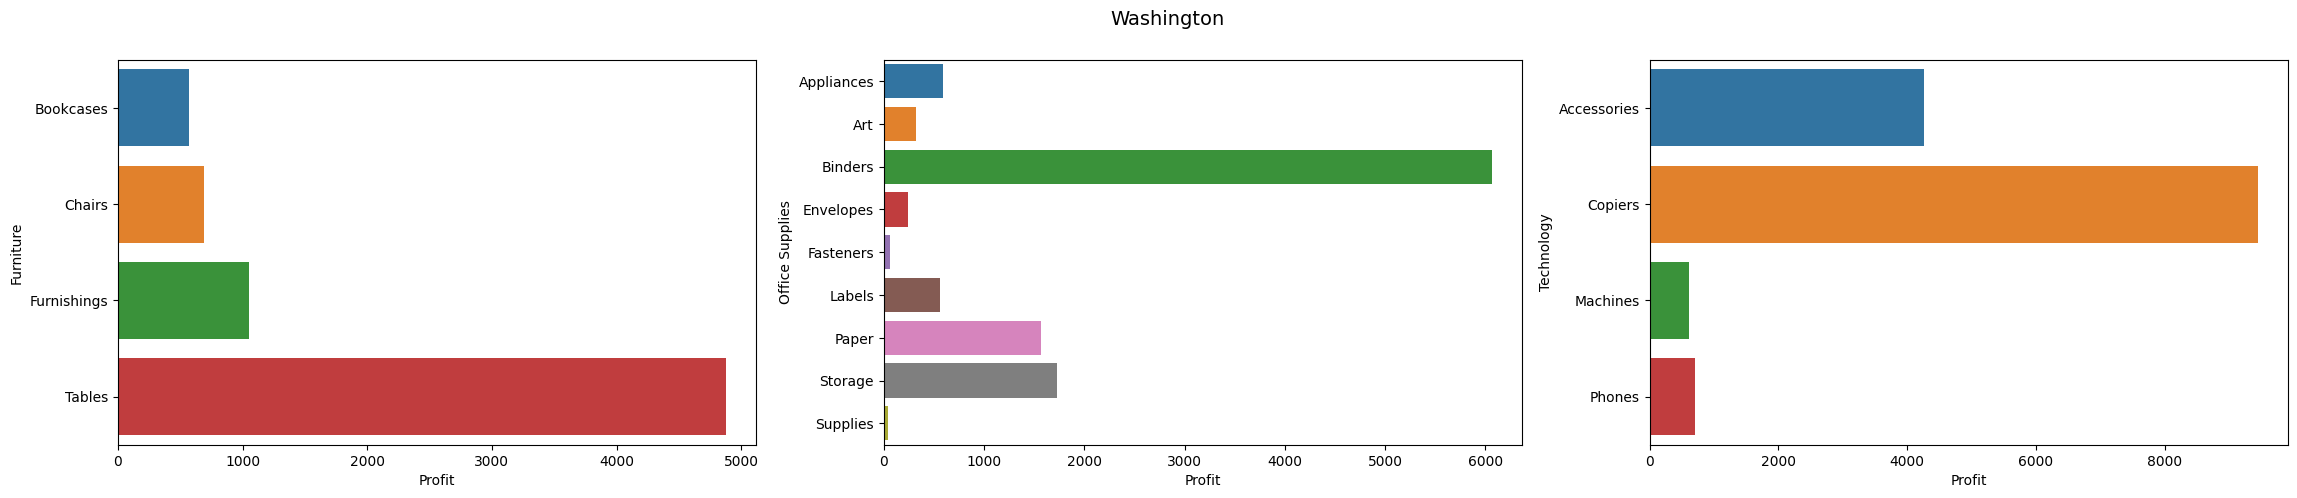

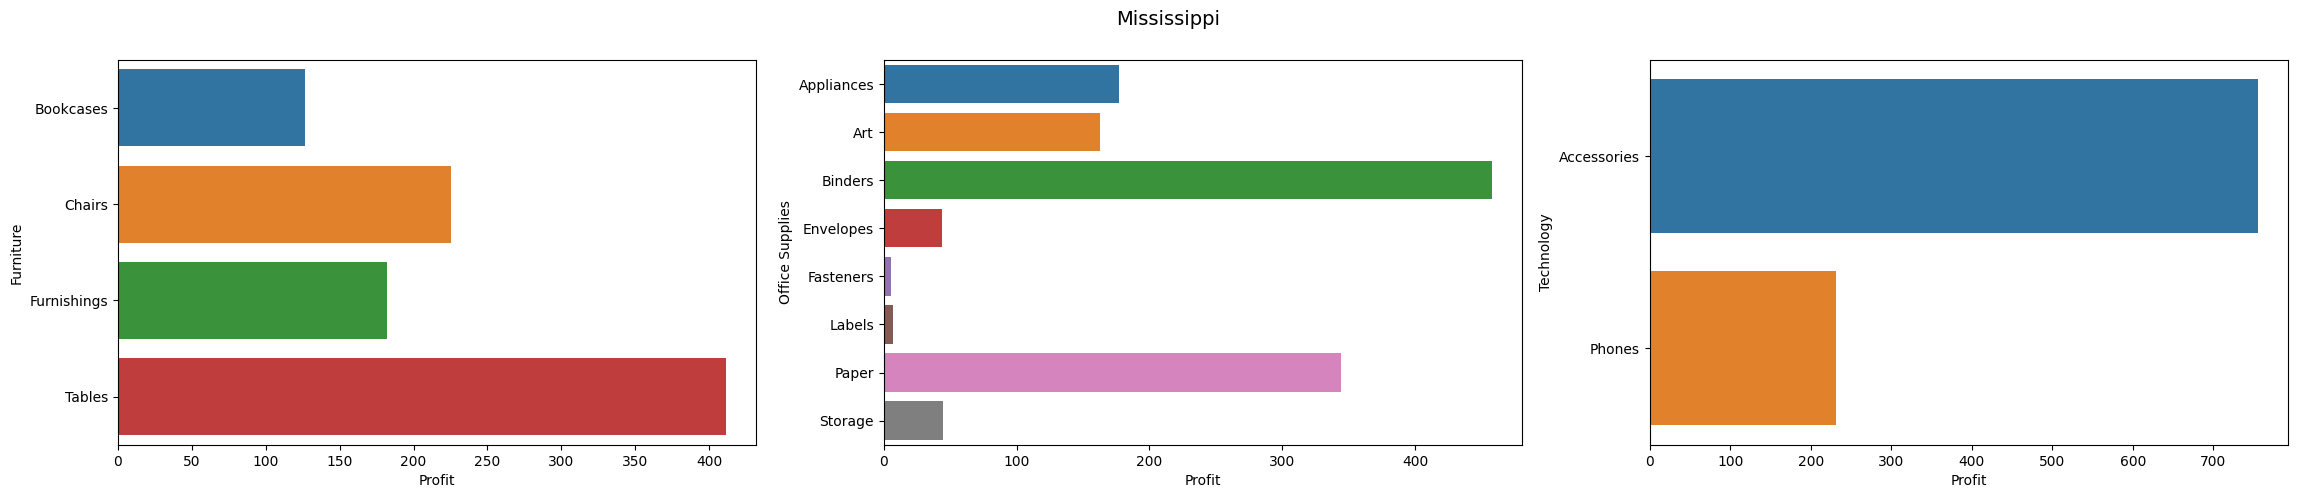

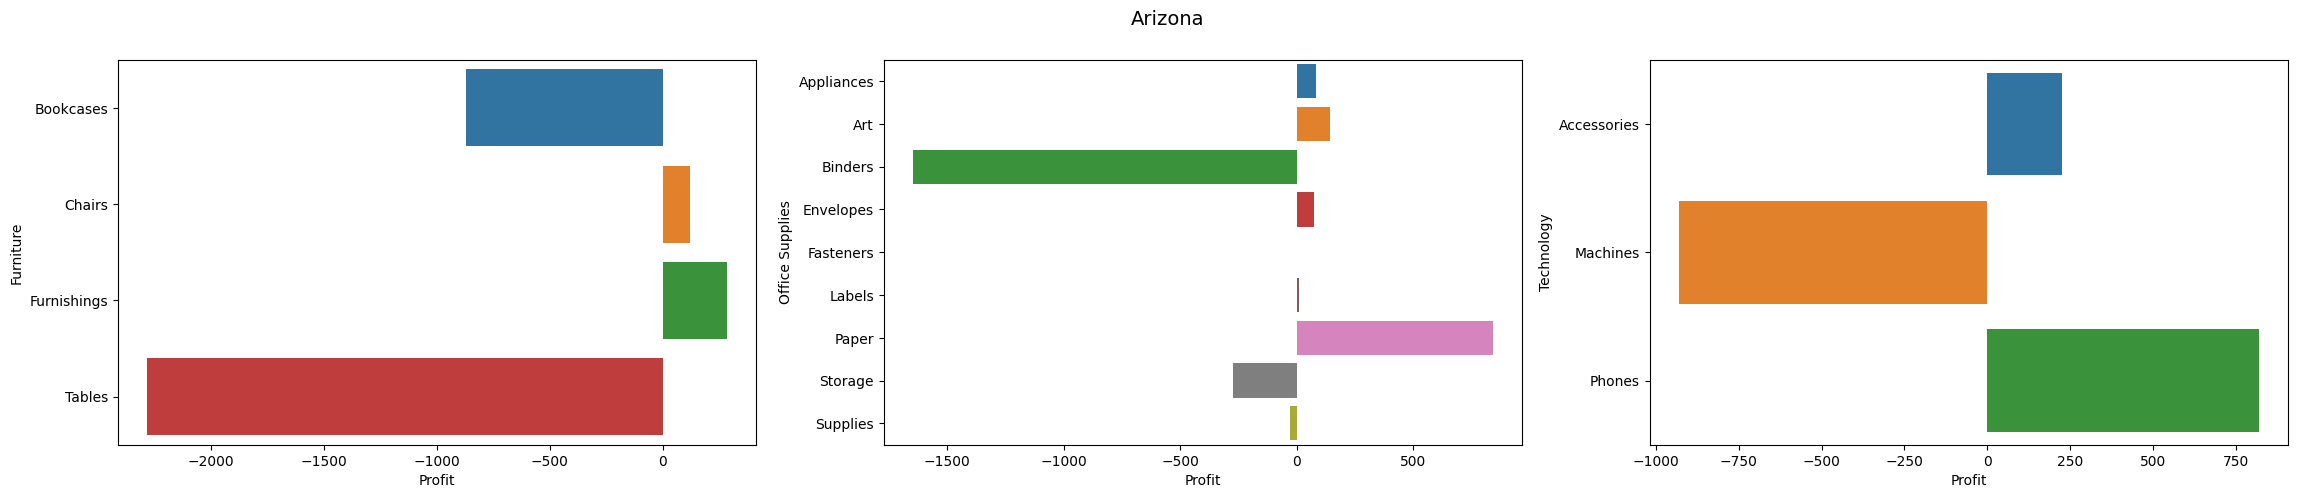

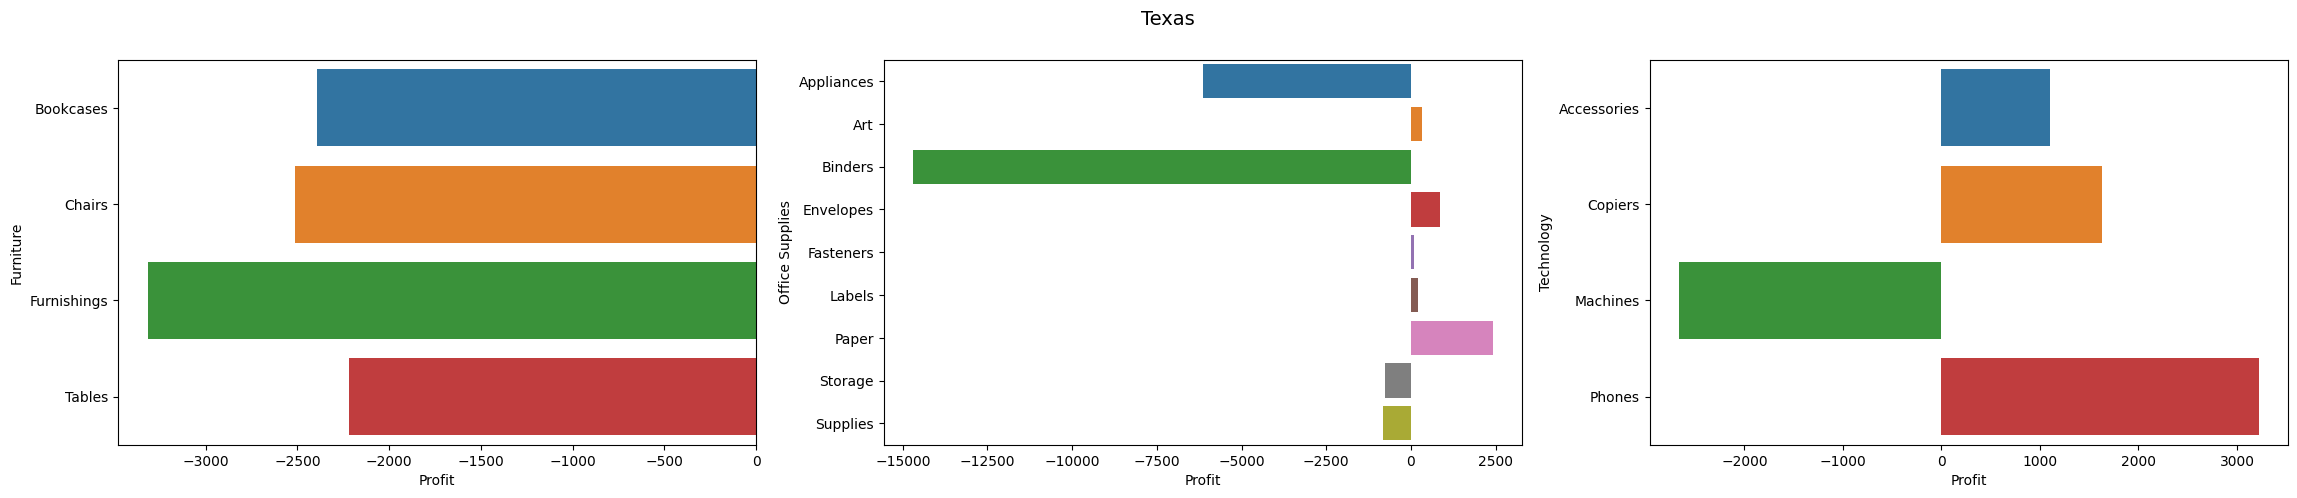

In [68]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

**Observations from the above given plots:**
- In the state of California, the highest revenue generating state for the supermarket, while all the products sold across each category are generating high-to-low profits, tables in furniture category is generating an overall loss. I verified the same with New York, the second highest revenue generating state.

- Washington, has a very positive performance, with profits generating over all product categories. A few of the low performing product sub categories are- bookcases, supplies, fasteners, machines and phones. Overall, office supplies and technology categories make the most profit for the supermarket.

- In the state of Mississippi, a low profit generating state, we see that the Furniture category performs slightly better than the other two categories.The Technology category performs the worst. I observed this same trend in other low profit generating states as well.

- In low-loss states like Arizona, the highest loss generating sub-categories are- Tables, binders, machines, storage, and book cases.

- In Texas, the highest loss state, the furniture category is going entirely in loss, generating massive losses for the supermarket. The performance is soo bad that the best option for the supermarket will be to end its furniture business in the state.

In [69]:
df['price_per_product'] = df.Sales / df.Quantity
df['profit_per_product'] = df.Profit / df.Quantity

data = df.groupby(['Category'])

for cat, df in data:
    sizes = np.absolute(df.price_per_product)
    fig = px.scatter(df, x = 'price_per_product', title = cat.upper(),
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        height = 500,
        xaxis = dict(title='Price Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

**Observation across each product category:**
1. Furnitures:

  - If we see the average price, we'll find that most of the tables and chairs are around the $200 mark, making them one of the most expensive furniture items.Some tables go as high as USD 550 while the most expensive chair costs USD 700.

  -  The most expensive item in the furniture category is a bookcase costing $880.

2. Office Supplies-

  - Most office supplies fall under the $100 mark.

  - Binders and supplies are the most expensive categories, going as high as $1890.

3. Technology-

  - As per the plot, products in the machines and copiers sub categories are the most expensive technology items.

  - Most products fall under the $200 price tag.

In [70]:
for cat, df in data:
    sizes = np.absolute(df.profit_per_product)
    fig = px.scatter(df, x = 'profit_per_product', title = cat.upper(),
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        autosize = True,
        height = 500,
        xaxis = dict(title='Profit/Loss Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

**Observation across each product category:**
1. Furnitures-

  - Upon observing the plot, it is evident that tables are one of the businesses where the supermarket is losing most of its money.

  - Book cases is another business where the supermarket is mostly just bearing losses.

  - If we see the overall performance, chairs seem to be generating the highest profits for the supermarket.

2. Office Supplies-

  - While binders generate most revenue for the company, it is also one of the highest-loss sub-categories in the office supplies category.

3. Technology-

  - The company's machine sales cause the highest loss, going as high as $1300 in loss.

In [71]:
for cat, df in data:
    subCat = df.groupby(['Sub-Category']).sum()
    fig = px.bar(subCat, y = 'Profit', title = cat.upper(),
                    color = subCat.index)
    fig.update_layout(
        autosize = True,
        width = 600,
        yaxis = dict(title='Profit/Loss Per Product Sub-Category'),
        xaxis = dict(title=''),
    )
    fig.show()

**From the above given plots:**
1. Tables and Bookcases are the businesses where the company is losing most of its money.

2. While the technology business is making most of the profits for the company, the machines business makes the least profit. The supermarket can improve in that sub-category.

3. Considering the combined turnover from each category, the furniture business is where the company is barely making any consideraable profit.Maybe the shipping modes and shipping costs for the furniture products, which are usually large, has something to do with the low profits/high losses.

In [72]:
ship_segment = df.groupby(['Segment'])
segment_list = df.Segment.value_counts().index
cat_list = df.Category.value_counts().index

for segment in segment_list:
    seg_shipping = ship_segment.get_group(segment)
    standard, second, first, same = [], [], [], []
    for cat in cat_list:
        count = seg_shipping.groupby(['Category']).get_group(cat)['Ship Mode'].value_counts()
        standard.append(count[0]), second.append(count[1]), first.append(count[2]), same.append(count[3])

        fig = go.Figure()
    fig.add_trace(go.Bar(x = cat_list,y = standard,name='Standard Class',marker_color='rgb(137,51,51)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = second,name='Second Class',marker_color='rgb(234,84,84)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = first,name='First Class',marker_color='rgb(250,127,78)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = same,name='Same Day',marker_color='lightsalmon'
                        ))

    fig.update_layout(
        barmode ='group',
        width = 600,
        title = segment.upper(),
        yaxis = dict(title = 'Number of Deliveries'))
    fig.show()

**Observations from the above plot:**
1. Standard class shipping is the most used shipping method across all consumer segments and product categories.

2. Across all three consumer segments, office supplies are the most bought products, and the technology items are the least bought products.

In [73]:
df['loss'] = df.Profit.apply(lambda x: x if (x < 0) else 0)

fig = px.bar( df,x = 'Ship Mode', y = 'loss', title = 'Losses in Each Shipping Category'.upper(),
                    color = 'Ship Mode', hover_data=['loss', 'Sub-Category'])
fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Total Loss'),
        xaxis = dict(title='Shipping Class'),
    )
fig.show()

**Observations from the plot above:**
1. The highest loss beared by the company was while delivering products via the standard class shipping. This is of no surprise, since most products were delivered using standard shipping. However, one important thing to be noted is that some of the biggest losses beared by the superstore also fall under the standard shipping category, one going as high as $6,600 in a single sale.

2. First and second class shipping have almost equal losses. This is also no surprise since the number of sales shipped under each shipping category were also almost equal.

In [74]:
df['whether_discount'] = df.Discount.apply(lambda x: 'No Discount' if (x == 0) else 'Discount')

discount_data = df.groupby(['whether_discount']).mean()

def discount_plotter(data_type = 'total'):
    """Plots discount data related plots.
    Args:
        data_type- 'total' or 'average', depending on you want the average statistics or total stats.
    """
    color = ['rgb(81,81,246)', 'rgb(209,70,70)']
    if data_type == 'average':
        discount_data = df.groupby(['whether_discount']).mean()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
    else:
        discount_data = df.groupby(['whether_discount']).sum()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALE', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Sales, marker_color = color),
            row=1, col=1
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Profit, marker_color = color),
            row=1, col=2
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.price_per_product, marker_color = color),
            row=1, col=3
    )
    fig.update_layout(showlegend=False)
    fig.show()

discount_plotter('average')
discount_plotter()

**Observations from the above given plots:**
1. Considering both average and total sales, it seems that people tend to buy more things when it is selling at a discounted price. An average sale at discounted price is of around USD 232 as compared to USD 226 on undiscounted price.

2. On an average, a discounted sale results in a loss of around USD 6 as compared to around USD 66 in profit on a non- discounted sale. Also, the company made a total profit of around USD 320K on non-discount sales, as compared to a loss of around USD 34K on discounted sales.

3. The average price of a discounted product is around USD 62, while the same is around USD 58 for a non-discounted item.



---

